# Machine Learning with Python - Trial Workshop
Seyoon Ko

Assumption for this Trial Workshop: a little bit of knowledge in numpy and matplotlib.

Packages necessary: 
- numpy - numerical arrays
- matplotlib - visualization
- scikit-learn - machine learning
- python-graphviz - graph visualization (used for visualization of decision trees)

An environment with all the necessary setup is provided through binder. Binder provides jupyter notebooks running on a cloud.

To execute the code in each cell, select the cell by clicking on it, then press the `Run` button above, or press `Shift`+`Enter` on the keyboard.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn # scikit-learn
import graphviz # Python interface for graphviz library

## Machine Learning


### What is Machine learning?

> field of study that gives computers the ability to learn without being explicitly programmed
- Arthur Samuel, 1959

The computer learns a *model* from the data.  
- a framework trained from data to determine the output when input data are given.


Human just defines...

- _data_ that computer learns from
- _algorithm_ - procedure that is run on data to create a model 
    - (penalized) linear regression, decision tree, support vector machine, deep neural networks, etc. 
- _hyperparameters (optional)_ - external configuration for each algorithm. e.g., how much should the computer try to simplify the model? 







## Types of Learning

- Supervised learning -  with pairs of example inputs their desired outputs (*labels*)
    - Classification: e.g., decision tree, $k$-nearest neighbor classifier, naive Bayes
    - Regression: e.g., linear regression 
- Unsupervised learning - with unlabeled data
    - Clustering: e.g., $k$-means, density-based clustering
- Semi-supervised learning, reinforcement learning, etc.


## Classification

A task of identifying the category each input belongs to (categories predefined)

Example: 

- identify the type of fruit based on its width and height, e.g. lemon vs. orange
- identify the type of cancer cell based on its shape e.g. benign cell vs. malignant cell


- *target*: category we want to identify
- to do so, we look at *features*: individual measurable properties of objects studied
    - width, height, etc. of a fruit
    
    
Procedure

- First, model learns from the example how to discriminate between classes
- When the model is trained, we use it to make predictions






## Exmaple Algorithm: Decision Tree

classification represented by a simple flowchart-style structure. 

"learning rule": 

1. Select a feature
2. Select a threshold that separates data points from different classes *the best* 

1 and 2 are repeated until we have a satisfactory model (stopping criteria)


![](https://miro.medium.com/max/4800/1*sLKdGqGJU9Bay1i2y-91Bg.png)
[source: lecture notes of P. Protopapas, Harvard University]

- _root_: the node on the top of the tree i.e. first overall splitting
- _leaf node_: the nodes at the bottom of the tree, no more splitting
- _depth_ of tree: maximum distance between the root and leaf nodes



## Example dataset
A synthetic example dataset. (unrelated to the previous examples)

Two data files provided:

* `CollML_testdataset_features.dat`: features for each sample
* `CollML_testdataset_labels.dat`: class of each sample



In [2]:
features = np.loadtxt('CollML_testdataset_features.dat')
labels = np.loadtxt('CollML_testdataset_labels.dat')

In [3]:
print("Shape of features", features.shape)
print("Shape of labels", labels.shape)

Shape of features (500, 2)
Shape of labels (500,)


In [4]:
np.unique(labels)   ## shows unique values in an array

array([0., 1.])

We have a dataset with 500 samples and 2 features. The goal is to create a classifier that reproduces the _labels_ based on _features_. 

### Train-test split

To evaluate the performance of an algorithm after training a model, we split the data into a "training set" and a "test set".

- training set: used to fit the machine learning model.
- test set: used to evaluate the fit machine learning model. Shall not be used in training, to see how well the model _generalizes_ to the data yet to be seen by the classifier


In [5]:
from sklearn.model_selection import train_test_split
seed = 3
features_train, features_test, labels_train, labels_test = train_test_split( 
                features, labels, test_size=0.2, 
                random_state=seed)

Note: `random_state=seed` is used to make sure that we get the same training-test split every time we run this function (reproducibility). 

In [6]:
print("Shape of the whole dataset",features.shape)
print("Shape of the train dataset",features_train
      .shape)
print("Shape of the test dataset",features_test.shape)

Shape of the whole dataset (500, 2)
Shape of the train dataset (400, 2)
Shape of the test dataset (100, 2)


## Visualization

Let's visualize the training set. 
- Class "0": blue circles
- Class "1": red squares

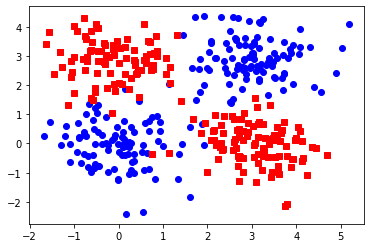

In [7]:
plt.plot( features_train[ labels_train == 0, 0 ], features_train[ labels_train == 0, 1 ], 'bo'  )
plt.plot( features_train[ labels_train == 1, 0 ], features_train[ labels_train == 1, 1 ], 'rs'  )
plt.show()

### Fitting a decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10,random_state=seed)

- `max_depth` : a hyperparameter, controls complexity of the resulting model by limiting the depth of the tree 
- `random_state` is used once again for the sake of reproducibility (something random is involved in the algorithm)

Variable `clf` will contain all information learned by the classifier. To perform the learning step, we use the method `fit()`:

In [9]:
clf.fit(features_train, labels_train)

DecisionTreeClassifier(max_depth=10, random_state=3)

The method `predict(features)` predicts the label of each data point in `features`. For example, to get a prediction for the datapoint (0, 1):

In [10]:
clf.predict([[0, 1]])

array([0.])

It is classified to class "0". 

The method `score(features, labels)` gives the accuracy of the classifier on `features` and `labels`.

In [11]:
clf.score(features_train, labels_train)

0.9975

We have a classifier that almost perfectly classifies the training set. 

We can also see the accuracy on the test set: 

In [12]:
clf.score(features_test, labels_test)

0.91

The learned tree can be visualized through the package `graphviz`. 

In [13]:
from sklearn.tree import export_graphviz

In [14]:
def show_tree(clf):
    filename = 'tmp.dat'
    export_graphviz(clf, filename) 
    return graphviz.Source.from_file(filename)  

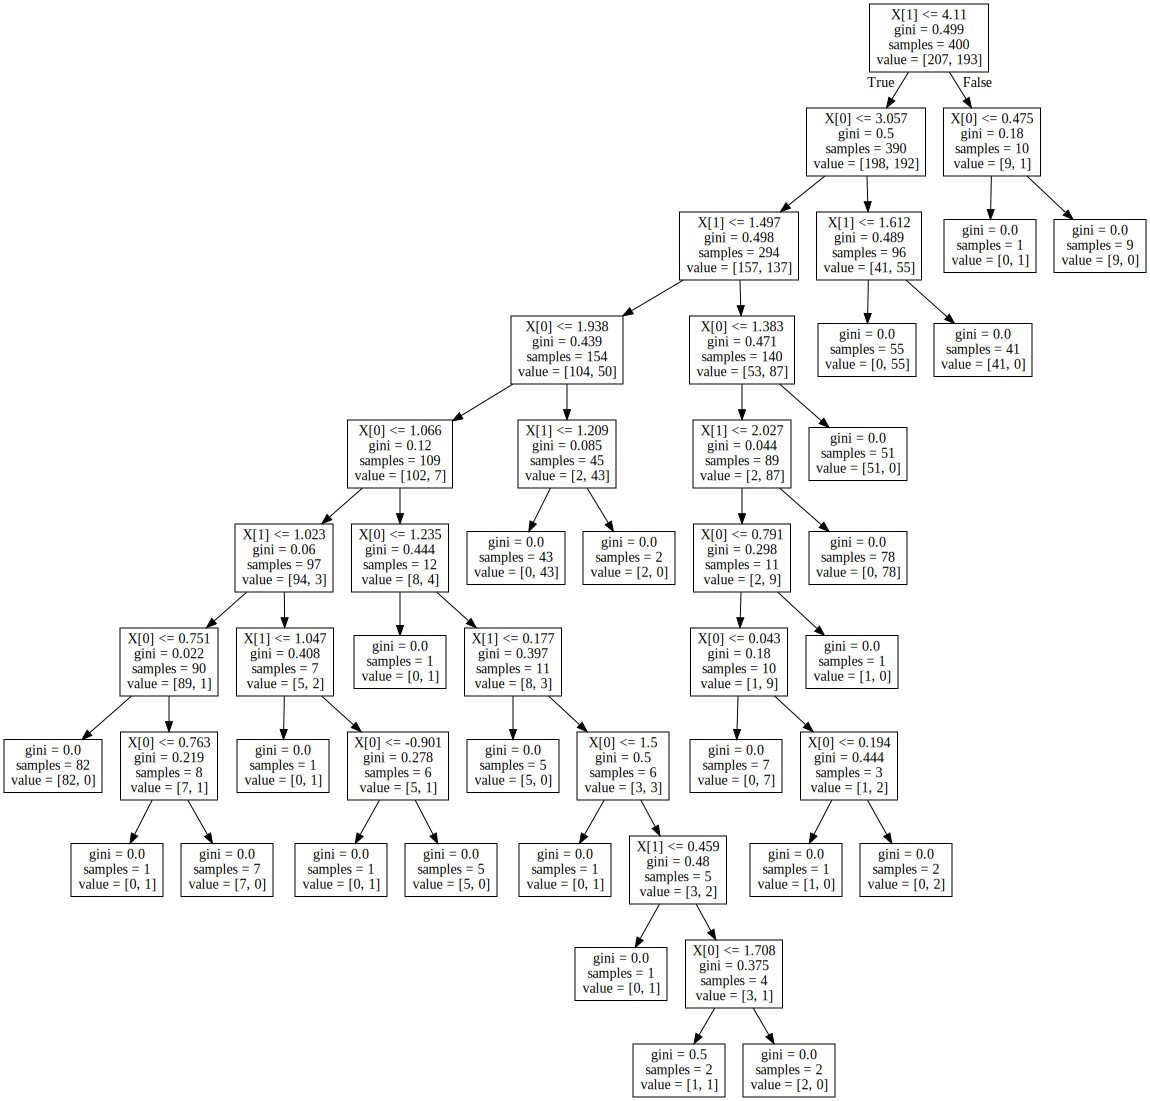

In [15]:
show_tree(clf)

Let's visualize the decision boundary:

In [16]:
def show_decision_boundary(clf):  
    delta = 0.01
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)

    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

    plt.show()

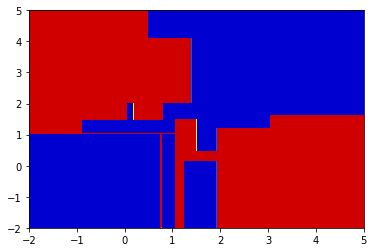

In [17]:
show_decision_boundary(clf)

- Blue: Class "0"
- Red: Class "1"

This looks overly complicated, and it might have hurt classification performance on the test set because of this. This is called _overfitting_. We might need a simpler model to generalize well.

Let's try a smaller `max_depth`. 

In [18]:
clf = DecisionTreeClassifier(max_depth=2, random_state=seed)

In [19]:
clf.fit(features_train, labels_train)

DecisionTreeClassifier(max_depth=2, random_state=3)

In [20]:
clf.score(features_train, labels_train)

0.555

In [21]:
clf.score(features_test, labels_test)

0.49

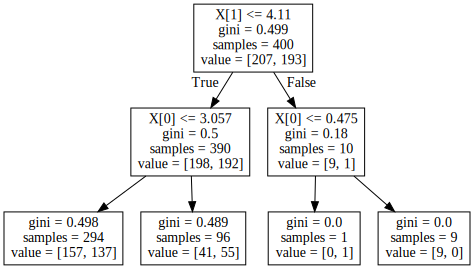

In [22]:
show_tree(clf)

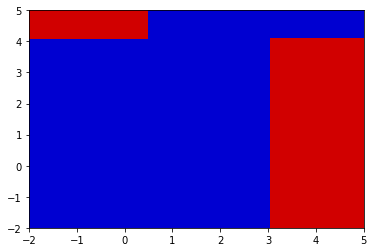

In [23]:
show_decision_boundary(clf)

The decision boundary is way too simple, and the classifier does not perform well on the test set. This is called _underfitting_. We need more complex model for better performance.

 Let's try to get something in the middle.

In [24]:
clf = DecisionTreeClassifier(max_depth=5, random_state=seed)
clf.fit( features, labels )
clf.score( features, labels )

0.966

In [25]:
clf.score( features_test, labels_test )

0.94

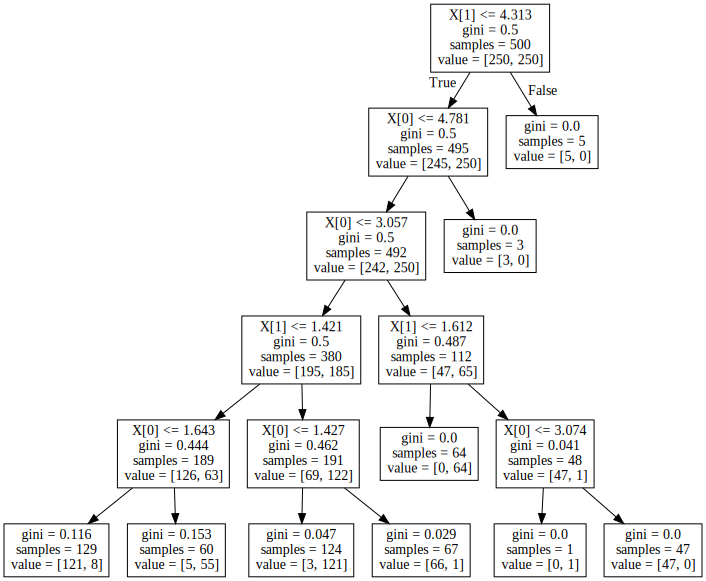

In [26]:
show_tree(clf)

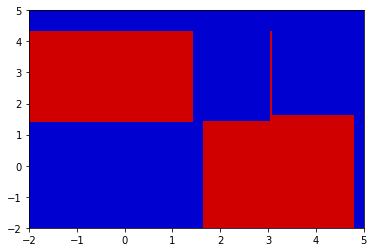

In [27]:
show_decision_boundary(clf)

Looks better. 

We have evaluated the test accuracies:

| `max_depth = 2` | `max_depth = 5` | `max_depth=10` |
|---:|---:|---:|
| 0.49 | 0.94 | 0.91 |

The model with `max_depth = 5` is the best.

### Hyperparameter selection
Then is it OK to choose to use `max_depth=5` and use the test set performance to represent performance of decision tree algorithm?

__NO__. Why? We make a decision on configuration of algorithm using the test set, and also evaluate the performance using the test set. We may overfit to the dataset we have. Remember, we want our classifiers generalize well to external data points we did not see in the training process. 

For this purpose, we split out another set of holdout data from the training set, called *validation set*.

![](training_validation_test.png)

$k$-fold cross-validation, a commonly-used hyperparameter selection method is based on choosing different validation set iteratively. (to be covered in a full workshop)
